In [1]:
# import mne

import mne
import matplotlib
import numpy as np

## 1. Load data

In [ ]:
path = mne.datasets.eegbci.load_data(3,1)
path[0]

raw = mne.io.read_raw_edf(path[0], preload=True)
raw.info['chs']

WindowsPath('C:/Users/MDBI/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R01.edf')

In [13]:
raw = mne.io.read_raw_edf(path[0], preload=True)
raw.info['chs']

Extracting EDF parameters from C:\Users\MDBI\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S003\S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


[{'cal': 1.0,
  'logno': 1,
  'scanno': 1,
  'range': 1.0,
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'ch_name': 'Fc5.',
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])},
 {'cal': 1.0,
  'logno': 2,
  'scanno': 2,
  'range': 1.0,
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'ch_name': 'Fc3.',
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])},
 {'cal': 1.0,
  'logno': 3,
  'scanno': 3,
  'range': 1.0,
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'ch_name': 'Fc1.',
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'kind': 2 (FIFFV_EEG_CH),
  'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])},
 {'cal': 1.0,
  'logno': 

In [15]:
from mne.datasets import eegbci

# set channel names
eegbci.standardize(raw)

# set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

<RawEDF | S003R01.edf, 64 x 9760 (61.0 s), ~4.9 MB, data loaded>

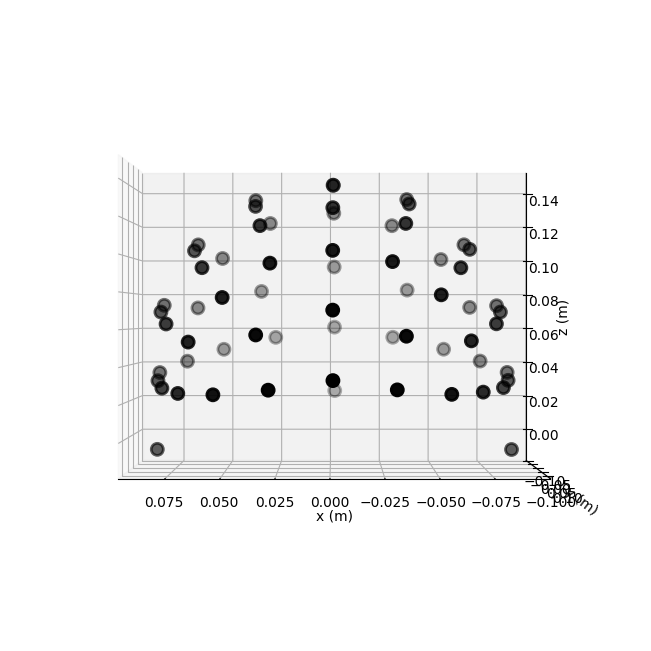

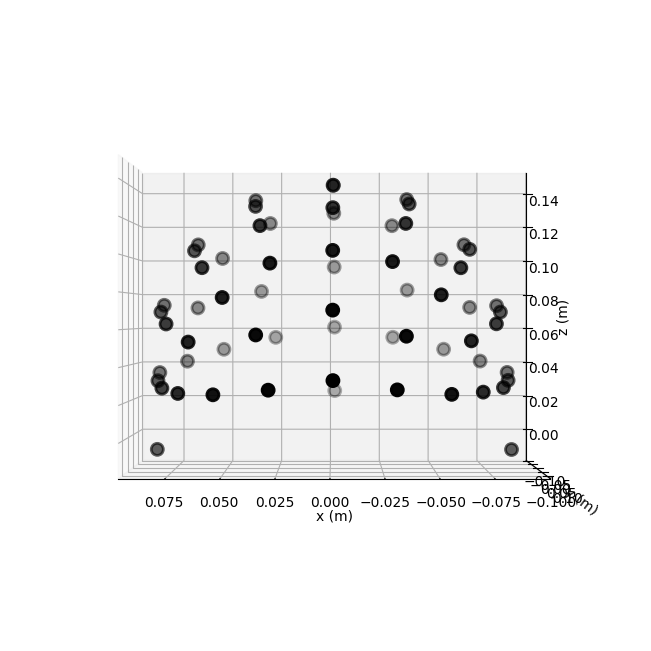

In [5]:
raw.plot_sensors(kind='3d')

In [6]:
# set notch filter
raw.notch_filter(60)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)



<RawEDF | S003R01.edf, 64 x 9760 (61.0 s), ~4.9 MB, data loaded>

In [7]:
raw.filter(l_freq=1.0, h_freq=50.0) # only keeping frequencies between 1-50 Hz

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)



<RawEDF | S003R01.edf, 64 x 9760 (61.0 s), ~4.9 MB, data loaded>

In [8]:
raw.info['sfreq']

160.0

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 17.067 (s)
Plotting power spectral density (dB=True).


c:\Users\MDBI\AppData\Local\miniforge3\envs\eeg-data-env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


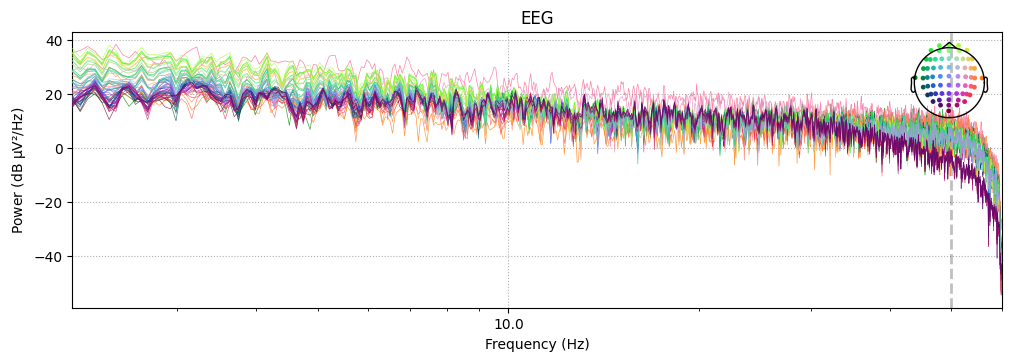

In [9]:
# Downsample a lot
raw.resample(120, npad='auto')
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=60, average=False, spatial_colors=True, xscale='log');
# Notice that the max plotted frequency is 60, the nyquist rate!

In [20]:
raw.shape

AttributeError: 'RawEDF' object has no attribute 'shape'

In [18]:
raw.compute_tfr(method="multitaper")

TypeError: compute_tfr() missing 1 required positional argument: 'freqs'